In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

from sklearn import model_selection
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
# https://stackoverflow.com/questions/25336176/does-scikit-learn-include-a-naive-bayes-classifier-with-continuous-inputs
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
import xgboost
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
from tabulate import tabulate
from operator import itemgetter

# https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import ast
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split    
from funcs_ml import model_using_train_test_split, model_using_kfold, model_using_time_series_split, model_using_grid_search_cv_with_timeseriessplit
from funcs_ml import feature_selection_by_extra_tree_regressor, feature_selection_by_xgb, xgb_gridsearch_cv, lightgbm_gridsearch_cv
from funcs_ml import test_model_iteratively_with_most_important_features, train_best_model

# Read Data

## Ireland

In [2]:
df_ireland = pd.read_csv("data/final/df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv")

In [3]:
df_ireland

,Unnamed: 0,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
0,1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1,1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
2,1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
3,1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
4,1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,...,7.54300,6.22100,7.84500,7.63800,14.04300,14.20900,4.95000,3.36400,20.49700,25.05500
274,2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,...,7.39400,6.18800,8.72500,7.63800,14.04300,14.20900,4.94800,3.36800,19.40400,22.93100
275,2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,...,7.56400,6.22100,7.40200,7.63800,14.04300,14.25800,4.94300,3.37600,18.68800,22.37900
276,2022-01-31,204.89,215.17,221.32,225.42,212.41,223.02,224.50,214.11,245.92,...,7.46200,6.20800,8.37200,7.63800,14.04300,14.25800,4.94600,3.22800,24.54400,27.65700


In [4]:
df_ireland = df_ireland.rename(columns={'Unnamed: 0':"date"})

In [5]:
df_ireland = df_ireland.set_index("date")

In [6]:
df_ireland.columns.sort_values()

Index(['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg',
       'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg',
       'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
       'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
       'bullocks_500-549kg', 'bullocks_550kg+', 'butter_per_lb',
       'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg',
       'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity',
       'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers',
       'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg',
       'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
       'heifers_350-399kg', 'heifers_400-449kg', 'irish_cheddar_per_kg',
       'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_ch

In [7]:
# these features combind make up the target_cattle target value so they are leaky features
# this basically means including them in the model training would be giving the model future information
# which we couldn't expect to have at the testing phase or whenver we try to do a prediction on new data
leakey_features=[
    'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
    'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
    'bullocks_500-549kg', 'bullocks_550kg+',
    'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
    'heifers_350-399kg', 'heifers_400-449kg']

In [8]:
y_col="target_cattle"

In [9]:
feature_cols = []
for col in df_ireland.columns:
    if col not in leakey_features:
        feature_cols.append(col)
feature_cols = sorted(feature_cols)
print(feature_cols)

['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg', 'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg', 'butter_per_lb', 'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals', 'compound_feeding_stuffs_for_cattle_excluding_calves', 'compound_feeding_stuffs_for_pigs', 'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg', 'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity', 'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers', 'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg', 'irish_cheddar_per_kg', 'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_chops_per_kg', 'lambs_liver_per_kg', 'marmalade_per_lb', 'milk', 'motor_fuel', 'mushrooms_per_kg', 'npk_fertilisers', 'onions_per_kg', 'other_goods_and_services', 'pbeefusdm', 'petrol', 'petrol_unleaded_per_ltr', 'pigs', 'pk_fertilisers', 'plant_protection_products', 'pork_loin_chops_per_kg', 'pork_sausages_per_kg', 'pork_steak_per_kg', 'potatoes', 'potatoes_10_kg', 'poultry', 'rai

In [10]:
feature_cols.remove(y_col)

In [11]:
X_ie = df_ireland[feature_cols]
y_ie = df_ireland[y_col]

https://scikit-learn.org/stable/modules/model_evaluation.html
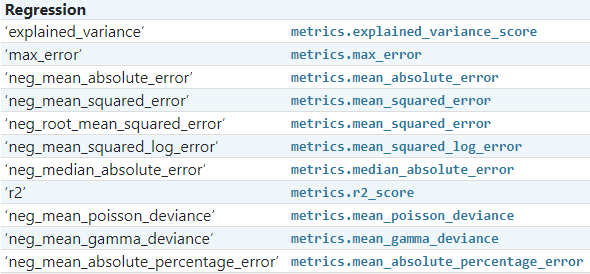

## Australia

In [12]:
df_australia = pd.read_csv("data/final/df_final_australian_beef_feat_cols_and_target_values_1999-2020.csv")

In [13]:
df_australia

,Unnamed: 0,beef_per_kg,meat_consumption,meat_exports,meat_imports,meat_distribution,meat_supply,cattle_production,swine_production_x,barley_production,...,sheep_slaughterings,cpi_all,cpi_residential,cpi_all_ex_food_energy,cpi_food,cpi_prod_index,diesel,petrol,pbeefusdm,crude_price
0,1999-01-31,2.71,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1326.0,62.967263,52.5088,64.117489,68.833314,64.792117,93.8,85.0,77.599998,12.49
1,1999-02-28,2.80,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1467.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.825000,12.02
2,1999-03-31,2.79,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1464.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.500000,14.68
3,1999-04-30,2.68,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1235.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,79.111111,17.30
4,1999-05-31,2.61,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1239.0,63.803111,53.9905,64.836722,69.152023,66.330209,93.8,85.0,79.850000,17.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2020-08-31,6.43,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,120.3,117.3,200.428571,42.39
260,2020-09-30,6.36,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,119.6,117.1,197.727273,39.63
261,2020-10-31,6.21,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,118.9,117.8,190.045455,39.56
262,2020-11-30,6.07,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,109.496169,123.6455,107.958167,106.631196,113.626532,118.2,115.6,190.785714,41.13


In [14]:
df_australia = df_australia.rename(columns={'Unnamed: 0':"date"})

In [15]:
df_australia = df_australia.set_index("date")

In [16]:
y_col_au="beef_per_kg"

In [17]:
feature_cols_au = []
for col in df_australia.columns:
    feature_cols_au.append(col)
feature_cols_au = sorted(feature_cols_au)
feature_cols_au.remove(y_col_au)
print(feature_cols_au)

['audcny', 'audnzd', 'audusd', 'barley_production', 'beef_and_veal_production', 'bulls_bullocks_steers_slaughterings', 'butter_production', 'calves_slaughterings', 'cattle_exclu_calves_slaughterings', 'cattle_exclud_calves_prod', 'cattle_production', 'cheese_production', 'corn_production', 'cotton_production', 'cows_heifers_slaughterings', 'cpi_all', 'cpi_all_ex_food_energy', 'cpi_food', 'cpi_prod_index', 'cpi_residential', 'crude_price', 'diesel', 'lamb_slaughterings', 'lambs_prod', 'meat_consumption', 'meat_distribution', 'meat_exports', 'meat_imports', 'meat_supply', 'milk_powder_production', 'milk_production', 'millet_production', 'nonfatmilk_production', 'oats_production', 'pbeefusdm', 'petrol', 'pig_slaughterings', 'pigs_prod', 'poultry_production', 'rain', 'rice_production', 'sheep_prod', 'sheep_slaughterings', 'sunshine', 'swine_production_x', 'swine_production_y', 'temp_cel', 'total_beef_prod', 'veel_prod', 'wheat_production']


In [18]:
X_au = df_australia[feature_cols_au]
y_au = df_australia[y_col_au]

# Model training

## Normal Train-Test Split

In [19]:
results_ie = model_using_train_test_split(X_ie, y_ie) # uses 70 30 split

Training: DummyRegressor
Training: LinearRegression
Training: DecisionTreeRegressor
Training: KNeighborsRegressor
Training: BayesianRidge
Training: SVR
Training: RandomForestRegressor
Training: XGBRegressor
Training: LGBMRegressor
Training: SGDRegressor
Training: KernelRidge
Training: GradientBoostingRegressor


In [20]:
print(tabulate(results_ie, headers=["model", "r2", "mae", "mse"]))

model                                r2           mae             mse
-------------------------  ------------  ------------  --------------
GradientBoostingRegressor   0.441         9.75          146.655
LGBMRegressor               0.31         10.918         181.02
XGBRegressor                0.233        11.424         201.211
SGDRegressor               -6.78512e+24   3.26878e+13     1.78053e+27
LinearRegression           -5.397        37.715        1678.8
DummyRegressor             -5.365        37.522        1670.34
KernelRidge                -4.476        35.615        1437.1
SVR                        -4.039        32.344        1322.24
DecisionTreeRegressor      -1.621        21.198         687.741
KNeighborsRegressor        -0.972        18.239         517.614
BayesianRidge              -0.532        18.231         401.911
RandomForestRegressor      -0.037        13.31          272.201


In [21]:
results_au = model_using_train_test_split(X_au, y_au) # uses 70 30 split

Training: DummyRegressor
Training: LinearRegression
Training: DecisionTreeRegressor
Training: KNeighborsRegressor
Training: BayesianRidge
Training: SVR
Training: RandomForestRegressor
Training: XGBRegressor
Training: LGBMRegressor
Training: SGDRegressor
Training: KernelRidge
Training: GradientBoostingRegressor


In [22]:
print(tabulate(results_au, headers=["model", "r2", "mae", "mse"]))

model                                 r2          mae          mse
-------------------------  -------------  -----------  -----------
SVR                         -9.95         2.297        5.792
KNeighborsRegressor         -8.971        2.158        5.274
RandomForestRegressor       -5.747        1.74         3.569
LGBMRegressor               -5.543        1.717        3.461
XGBRegressor                -5.018        1.651        3.183
GradientBoostingRegressor   -4.956        1.628        3.15
DecisionTreeRegressor       -4.272        1.501        2.788
LinearRegression            -3.831        1.439        2.555
BayesianRidge               -2.621        1.229        1.915
KernelRidge                 -2.239        1.158        1.713
SGDRegressor                -1.71812e+40  9.48457e+19  9.08726e+39
DummyRegressor             -10.988        2.411        6.34


## K-fold Cross-Validation

In [23]:
# at the beginning I naively used model_selection.train_test_split() with my time series data
# I then fed this to a standard k-fold cross validator and the prediction results were spectacular
# as can be seen below, the problem is it doesn't make sense to shuffle the time series data..
# and then take random folds of that shuffled data.
# I speculate the reason this naive approach was so accurate in its predictions
# is that gradually over the last twenty years the price of everything has gone up
# so higher prices of other products most likely correlated with higher beef prices

model_using_kfold(X_ie, y_ie)

DummyRegressor         r2: -8.372 STD: 7.27
LinearRegression       r2: -0.953 STD: 1.39
DecisionTreeRegressor  r2: -1.219 STD: 1.30
KNeighborsRegressor    r2: -1.144 STD: 1.26
BayesianRidge          r2: -0.134 STD: 0.83
SVR                    r2: -2.396 STD: 2.04
RandomForestRegressor  r2: -0.180 STD: 0.53
XGBRegressor           r2: 0.109 STD: 0.38


In [24]:
model_using_kfold(X_au, y_au)

DummyRegressor         r2: -13.571 STD: 12.78
LinearRegression       r2: -44.358 STD: 41.93
DecisionTreeRegressor  r2: -1.871 STD: 2.08
KNeighborsRegressor    r2: -10.064 STD: 9.79
BayesianRidge          r2: -2.866 STD: 3.30
SVR                    r2: -10.990 STD: 15.01
RandomForestRegressor  r2: -1.308 STD: 1.52
XGBRegressor           r2: -0.824 STD: 0.85


## TimeSeriesSplit Cross-Validation

In [25]:
results_ie = model_using_time_series_split(X_ie, y_ie)

In [26]:
print(tabulate(results_ie, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2             r2        tr_mae           mae         tr_mse             mse
-------------------------  ------------  -------------  ------------  ------------  -------------  --------------
SVR                         0.245         -8.656        10.961        20.79         262.896         768.983
BayesianRidge               0.946         -5.638         3.381        12.63          20.821         360.367
LGBMRegressor               0.887         -5.363         2.051        12.962         15.557         302.244
SGDRegressor               -1.49728e+26   -4.05203e+27   1.47754e+14   1.73778e+14    2.99453e+28     4.11203e+28
KNeighborsRegressor         0.911         -4.852         3.825        13.144         32.878         314.725
DecisionTreeRegressor       1             -3.884         0            14.668          0             462.947
RandomForestRegressor       0.992         -3.066         1.137        12.158          2.94          302.701
LinearRegr

In [27]:
results_au = model_using_time_series_split(X_au, y_au)

In [28]:
print(tabulate(results_au, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2             r2       tr_mae          mae       tr_mse          mse
-------------------------  ------------  -------------  -----------  -----------  -----------  -----------
LinearRegression            0.979         -5.918        0.059        0.445        0.006        0.358
KernelRidge                 0.975         -5.313        0.066        0.441        0.008        0.384
DecisionTreeRegressor       1             -4.928        0            0.509        0            0.487
LGBMRegressor               0.882         -3.88         0.086        0.454        0.027        0.399
SVR                         0.099        -20.56         0.428        0.961        0.35         1.73
DummyRegressor              0            -20.497        0.472        0.975        0.418        1.797
XGBRegressor                1             -2.915        0            0.4          0            0.356
RandomForestRegressor       0.986         -2.499        0.047        0.392      

I changed the code from something like:

tscv = TimeSeriesSplit(n_splits=cv_splits)

scores = cross_validate(cls, X, y, cv=tscv, scoring=scoring, return_train_score=True)

to a manual implementation:

for train_index, test_index in tscv.split(X):

            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            

And the results are equally as terrible.


cross_validate attempt is below and manual iteration is currently above (what's in the code).

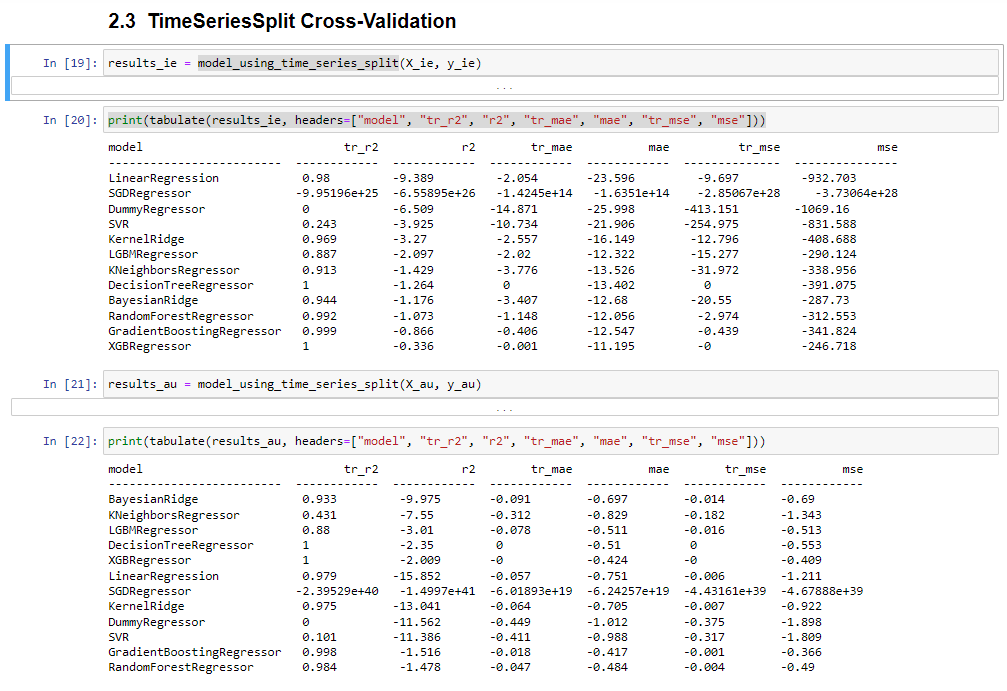

## GridSearchCV

In [29]:
results_ie = model_using_grid_search_cv_with_timeseriessplit(X_ie, y_ie)

Training: RandomForestRegressor
Fitting 10 folds for each of 90 candidates, totalling 900 fits
Training: XGBRegressor
Fitting 10 folds for each of 15 candidates, totalling 150 fits
[17:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training: LGBMRegressor
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Training: GradientBoostingRegressor
Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Training: DecisionTreeRegressor
Fitti

In [30]:
print(tabulate(results_ie, headers=["model", "r2", "mae", "mse"]))

model                          r2     mae      mse
-------------------------  ------  ------  -------
XGBRegressor                0.481   9.58   136.258
LGBMRegressor               0.275  11.179  190.168
RandomForestRegressor       0.23   11.702  202.088
GradientBoostingRegressor   0.136  12.075  226.726
DecisionTreeRegressor      -0.067  13.704  280.104


In [31]:
results_au = model_using_grid_search_cv_with_timeseriessplit(X_au, y_au)

Training: RandomForestRegressor
Fitting 10 folds for each of 90 candidates, totalling 900 fits
Training: XGBRegressor
Fitting 10 folds for each of 15 candidates, totalling 150 fits
[17:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training: LGBMRegressor
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Training: GradientBoostingRegressor
Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Training: DecisionTreeRegressor
Fitti

In [32]:
print(tabulate(results_au, headers=["model", "r2", "mae", "mse"]))

model                          r2    mae    mse
-------------------------  ------  -----  -----
LGBMRegressor              -9.292  2.216  5.444
DecisionTreeRegressor      -7.634  2.009  4.566
RandomForestRegressor      -6.168  1.797  3.791
GradientBoostingRegressor  -6.045  1.791  3.726
XGBRegressor               -4.908  1.624  3.125


# Optimize Gradient Boosting methods

## Ireland Gradient Boosters

In [33]:
results_xgb_ie = test_model_iteratively_with_most_important_features(X_ie, y_ie, xgb_gridsearch_cv)

Train model with feature_selection_by_extra_tree_regressor for 1 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_extra_tree_regressor for 26 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_extra_tree_regressor for 51 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_xgb for 1 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_xgb for 26 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_xgb for 51 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [34]:
results_lightgbm_ie = test_model_iteratively_with_most_important_features(X_ie, y_ie, lightgbm_gridsearch_cv)

Train model with feature_selection_by_extra_tree_regressor for 1 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_extra_tree_regressor for 26 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_extra_tree_regressor for 51 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_xgb for 1 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_xgb for 26 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_xgb for 51 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [35]:
selected_features = ast.literal_eval(results_xgb_ie['selected_features'].values[0])
_, _, _, y_test_ie = train_test_split(X_ie[selected_features], y_ie, test_size=0.2, random_state=42)

In [37]:
y_pred_xgb_ie = train_best_model(X_ie, y_ie, results_xgb_ie, XGBRegressor)

mape 0.03436183788949768
mae 6.17304311899038
r2 0.9193302150198759


In [38]:
y_pred_lightgbm_ie = train_best_model(X_ie, y_ie, results_lightgbm_ie, LGBMRegressor)

mape 0.037881632835548816
mae 6.6732534635514735
r2 0.9218807975069254


### Plotting

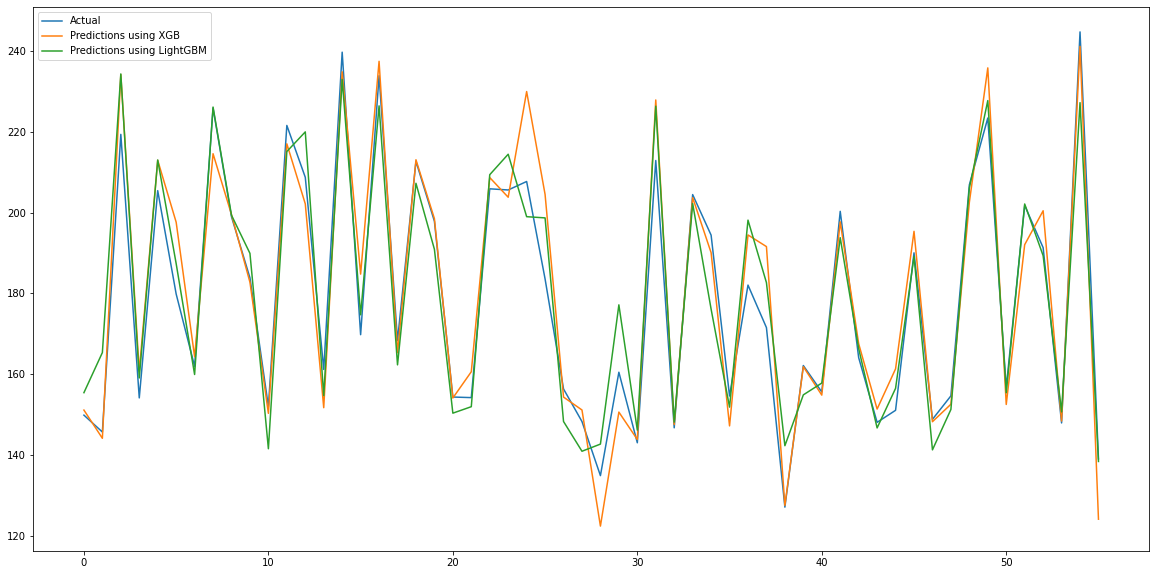

In [39]:
# Line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_test_ie.values, label='Actual')
plt.plot(y_pred_xgb_ie, label='Predictions using XGB')
plt.plot(y_pred_lightgbm_ie, label='Predictions using LightGBM')
plt.legend()

In [40]:
scores = pd.concat([results_lightgbm_ie.iloc[:1], results_xgb_ie.iloc[:1]], axis=0).loc[:,'split0_test_score':'mean_test_score']*-100
scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
359,5.146726,5.713666,8.027657,4.786143,4.926901,5.720219
107,7.122420,4.423909,6.488257,7.036207,3.956556,5.805470


Text(0, 0.5, 'Mean absolute percentage')

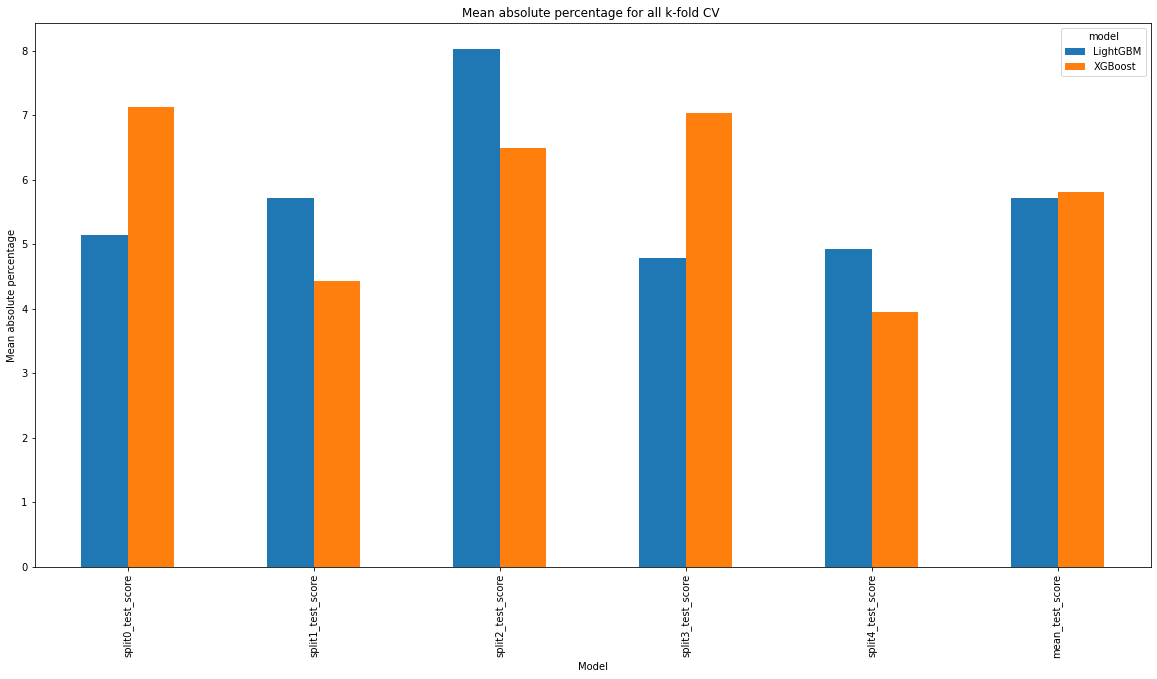

In [41]:
# barchart - k-fold
scores['model'] = ['LightGBM', 'XGBoost']
scores.set_index('model', inplace=True)
scores.T.plot(kind='bar', figsize=(20,10))
plt.title('Mean absolute percentage for all k-fold CV ')
plt.xlabel('Model')
plt.ylabel('Mean absolute percentage')

## Australia Gradient Boosters

In [42]:
results_xgb_au = test_model_iteratively_with_most_important_features(X_au, y_au, xgb_gridsearch_cv)

Train model with feature_selection_by_extra_tree_regressor for 1 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_extra_tree_regressor for 26 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_xgb for 1 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train model with feature_selection_by_xgb for 26 number of features.
Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [43]:
results_lightgbm_au = test_model_iteratively_with_most_important_features(X_au, y_au, lightgbm_gridsearch_cv)

Train model with feature_selection_by_extra_tree_regressor for 1 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_extra_tree_regressor for 26 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_xgb for 1 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train model with feature_selection_by_xgb for 26 number of features.
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [44]:
selected_features = ast.literal_eval(results_xgb_au['selected_features'].values[0])
_, _, _, y_test_au = train_test_split(X_au[selected_features], y_au, test_size=0.2, random_state=42)

In [45]:
y_pred_xgb_au = train_best_model(X_au, y_au, results_xgb_au, XGBRegressor)

mape 0.03365641640753015
mae 0.14555666005836343
r2 0.9720259532346396


In [46]:
y_pred_lightgbm_au = train_best_model(X_au, y_au, results_lightgbm_au, LGBMRegressor)

mape 0.03595360421995145
mae 0.1658900785479945
r2 0.9555982335991925


### Plotting

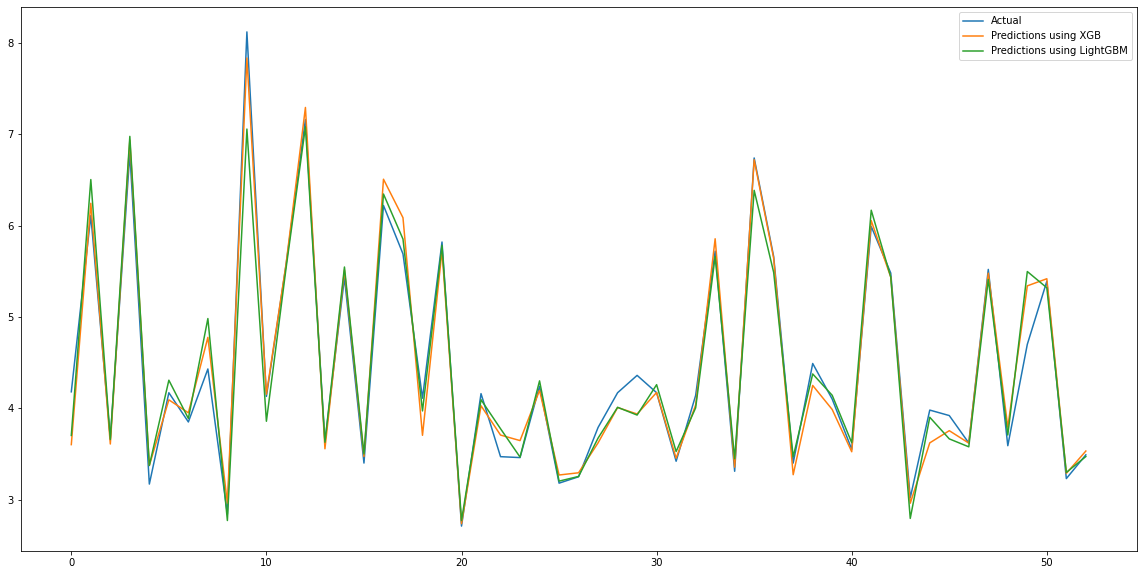

In [47]:
# Line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_test_au.values, label='Actual')
plt.plot(y_pred_xgb_au, label='Predictions using XGB')
plt.plot(y_pred_lightgbm_au, label='Predictions using LightGBM')
plt.legend()

In [48]:
scores = pd.concat([results_lightgbm_au.iloc[:1], results_xgb_au.iloc[:1]], axis=0).loc[:,'split0_test_score':'mean_test_score']*-100
scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
141,13.059292,4.777767,5.373141,11.588001,6.429764,8.245593
35,9.162332,4.909329,5.734410,5.487316,6.331603,6.324998


Text(0, 0.5, 'Mean absolute percentage')

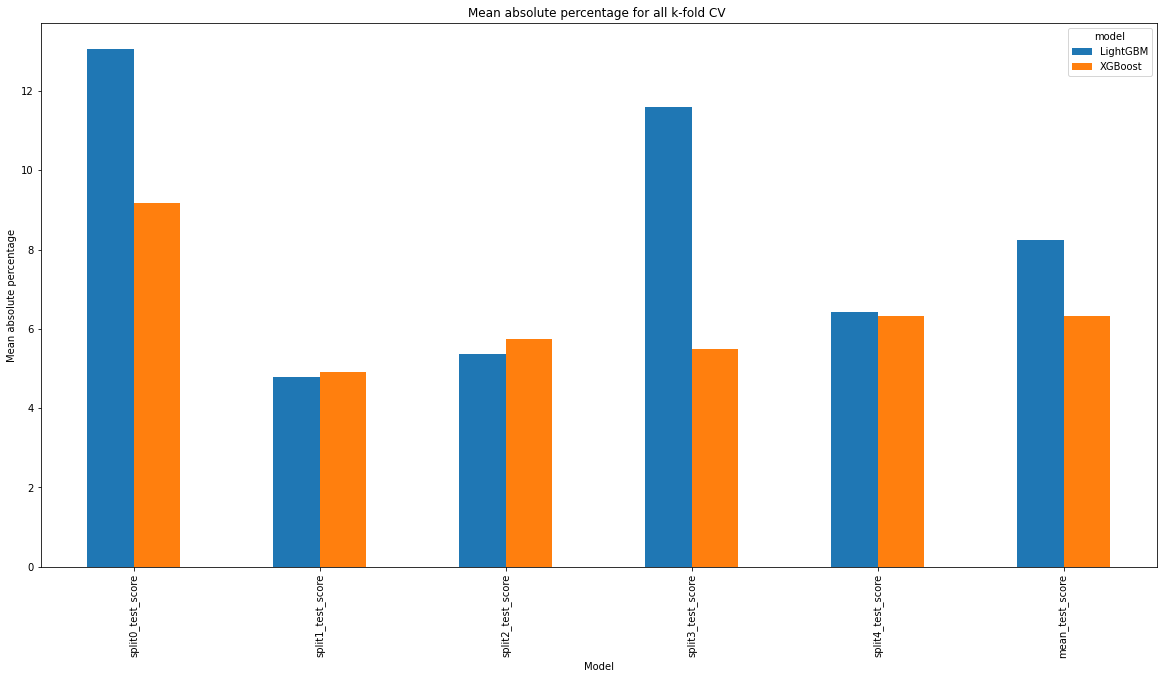

In [49]:
# barchart - k-fold
scores['model'] = ['LightGBM', 'XGBoost']
scores.set_index('model', inplace=True)
scores.T.plot(kind='bar', figsize=(20,10))
plt.title('Mean absolute percentage for all k-fold CV ')
plt.xlabel('Model')
plt.ylabel('Mean absolute percentage')